<a href="https://colab.research.google.com/github/nupur1262/Geeksman_AISquad_Project1_NUPUR/blob/master/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LINK OF GOOGLE-DRIVE:**
https://drive.google.com/drive/folders/1l2YpfjizmFyWurttuk-b5H1ZefDZAAws?usp=sharing

##**IMPORTING OUR TRAINED MODEL**
As in the second Notebook , we have created the link for export.pkl file , we are going to use that link to get that file here , so that we have access to the the Model that we have trained previously

In [ ]:


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-10 18:27:37--  https://docs.google.com/uc?export=download&confirm=b0DC&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl
Resolving docs.google.com (docs.google.com)... 173.194.218.101, 173.194.218.138, 173.194.218.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-6o-docs.googleusercontent.com/docs/securesc/akt4gk9hrcokj2op8ubu45efhjekefv9/bo7ickvoc2jijdm85vmuf8977qj101u1/1597084050000/00180827297015777168/05910327030164319657Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download [following]
--2020-08-10 18:27:37--  https://doc-10-6o-docs.googleusercontent.com/docs/securesc/akt4gk9hrcokj2op8ubu45efhjekefv9/bo7ickvoc2jijdm85vmuf8977qj101u1/1597084050000/00180827297015777168/05910327030164319657Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download
Resolving doc-10-6o-docs.googleusercontent.com (doc-10-6o-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Conne

**Importing Required Libraries**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
predictor = load_learner('/content/')

#**MAKING PREDICTION FUNCTION**
Making prediction function which accepts a test_image address as input and will return the corresponding predicted value for us.

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

**Uploading kaggle.json file**

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


**Setting environment variables , so that kaggle api can work properly**

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading the DataSet from Kaggle**

In [ ]:
!kaggle datasets download -d nupurpahuja09/dataset

 98% 22.0M/22.5M [00:00<00:00, 38.9MB/s]
100% 22.5M/22.5M [00:00<00:00, 72.4MB/s]


**Unzipping downloaded data**

In [ ]:
!unzip "*.zip"

Archive:  dataset.zip
  inflating: test_data/00000005.jpg  
  inflating: test_data/00000009.jpg  
  inflating: test_data/00000013.jpg  
  inflating: test_data/00000019.jpg  
  inflating: test_data/00000020.jpg  
  inflating: test_data/00000021.jpg  
  inflating: test_data/00000025.jpg  
  inflating: test_data/00000030.jpg  
  inflating: test_data/00000040.jpg  
  inflating: test_data/00000056.jpg  
  inflating: test_data/00000060.jpg  
  inflating: test_data/00000064.jpg  
  inflating: test_data/00000071.jpg  
  inflating: test_data/00000074.jpg  
  inflating: test_data/00000078.jpg  
  inflating: test_data/00000080.jpg  
  inflating: test_data/00000087.jpg  
  inflating: test_data/00000091.jpg  
  inflating: test_data/00000094.jpg  
  inflating: test_data/00000108.jpg  
  inflating: test_data/00000111.jpg  
  inflating: test_data/00000112.jpg  
  inflating: test_data/00000113.jpg  
  inflating: test_data/00000118.jpg  
  inflating: test_data/00000124.jpg  
  inflating: test_data/00000

**Predicting for a single image**

In [ ]:
all_test_images=os.listdir("/content/test_data1")

micromax


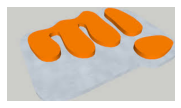

In [ ]:
idx=1
print(my_predictor("/content/test_data1/"+all_test_images[idx]))
img = open_image("/content/test_data1/"+all_test_images[idx])
img.show()

##**Making Video**

In [ ]:
import cv2
test_files=os.listdir("/content/test_data1")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test_data1/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (255, 0, 0) 
  thickness = 2
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)


In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

**Uploading the video on Kora-Drive**

In [ ]:
!pip install -U kora
from kora.drive import upload_public

In [ ]:
url = upload_public('my_final_output.mp4')

In [ ]:
url

'https://drive.google.com/uc?id=1z9-GFn0HpqHVjYC4KmDdK_ukXkCohPtr'

***Video can be seen here now***

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")